In [1]:
#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

dataset = pd.read_csv('P39-Financial-Data.csv')

In [ ]:
"""
entry_id             = user_id
age                  = age of the applicant
pay_schedule         = how often the applicant gets paid:
home_owner           = if the user is owner of home, 1-yes, 0-no
income               = the user income 
months_employed      = how many months the user working in the current job
years_employed       = how many years the user working in the current job
current_address_year = how many tears the user live in the current address
personal_account_m   = how many months the user has personal account
personal_account_y   = how many years the user has personal account 
has_debt             = whether the user had any debt
amount_requested     = what amount money the user applied for
risk_score           = risks scores from the finance
risk_score_2         = risks scores from the finance
risk_score_3         = risks scores from the finance
risk_score_4         = risks scores from the finance
risk_score_5         = risks scores from the finance
ext_quality_score    = scores from the marketplace
ext_quality_score_2  = scores from the marketplace
inquries_last_month  = how many inquries had the user last month
e_signed             = response variable, 1-the user completed e-signing process and 0-didn't
"""


## Exploratory Data Analysis

In [2]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


### Notes: 
        1. age                 : min 18, max 96 and mean 43 age                    - well balanced
        2. home_onwer          : 42% are home owners                               - well balanced
        3. income              : min 905, max 9985 and 3657 mean salary
        4. months_employed     : as expected min 0 max 12 months_employed
        5. years_employed      : min 0, max 16 and 3.5 mean years employed         - could have some outliers
        6. current_address_year: min 0, max 12 and mean 3.5 living adress years    - could have some outliers
        7. personal_account_m  : as expected min 0 max 12 months personal account
        9. personal_account_y  : min 0, max 15 and mean 3.5 years personal account - could have some outliers
        10.has_debt            : 79% has debts
        11.amount_requested    : min 350, max 10200 and mean 950 amount requested
        12.inquiries_last_month: min 1, max 30 and mean 6.4 inquiries              - could have some outliers
        13.e_signed            : 53% has e-signed                                  - well balanced

In [4]:
# Checking for NaN values
dataset.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

### Note:
        1. No missing values

In [5]:
# Checking for data types in the dataset
dataset.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

### Note: 
        1. Only one object type -  pay_schedule
    

In [6]:
#droping 'entry_id', 'pay_schedule' and 'e_signed'
dataset_hist = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'], axis = 1)

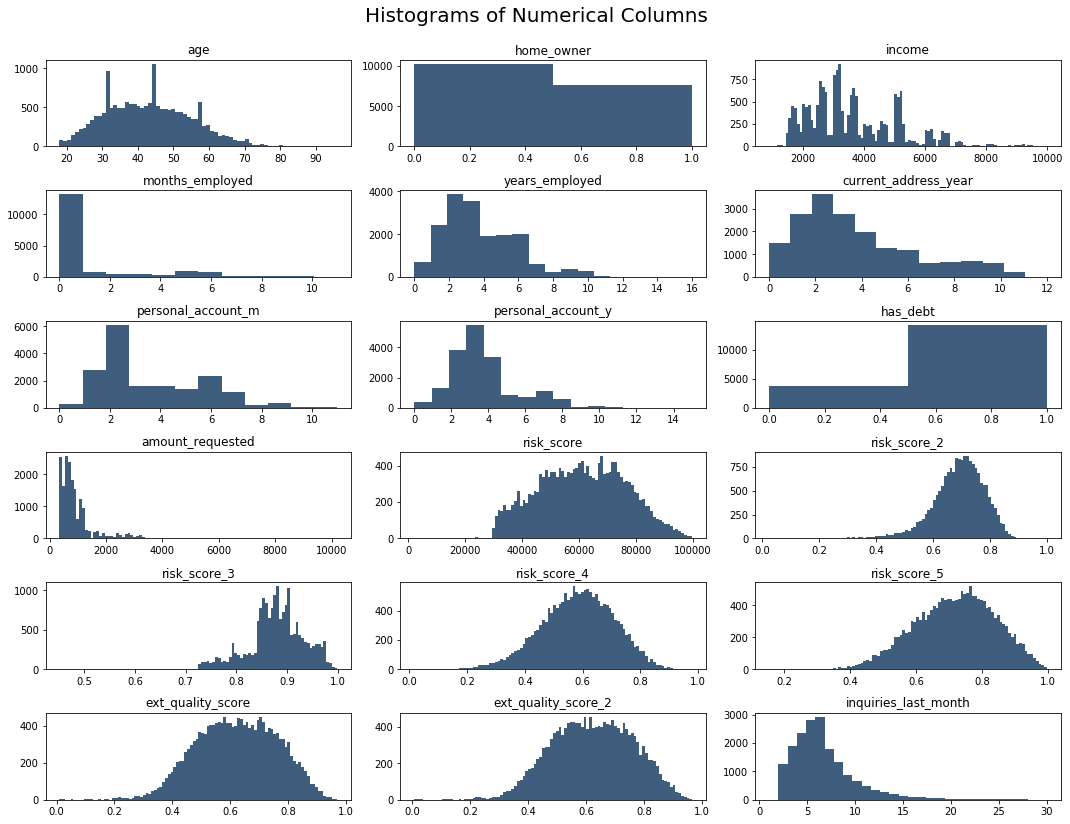

In [7]:
#Making Histogram
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset_hist.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset_hist.columns.values[i])

    vals = np.size(dataset_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset_hist.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Notes:
        1. Income right skewed
        2. months_employed and years_employed can be combined
        3. personal_account_m and personal_account_y can be combined
        4. amount_requested right skewed
        5. inquiries_last_month right skewed

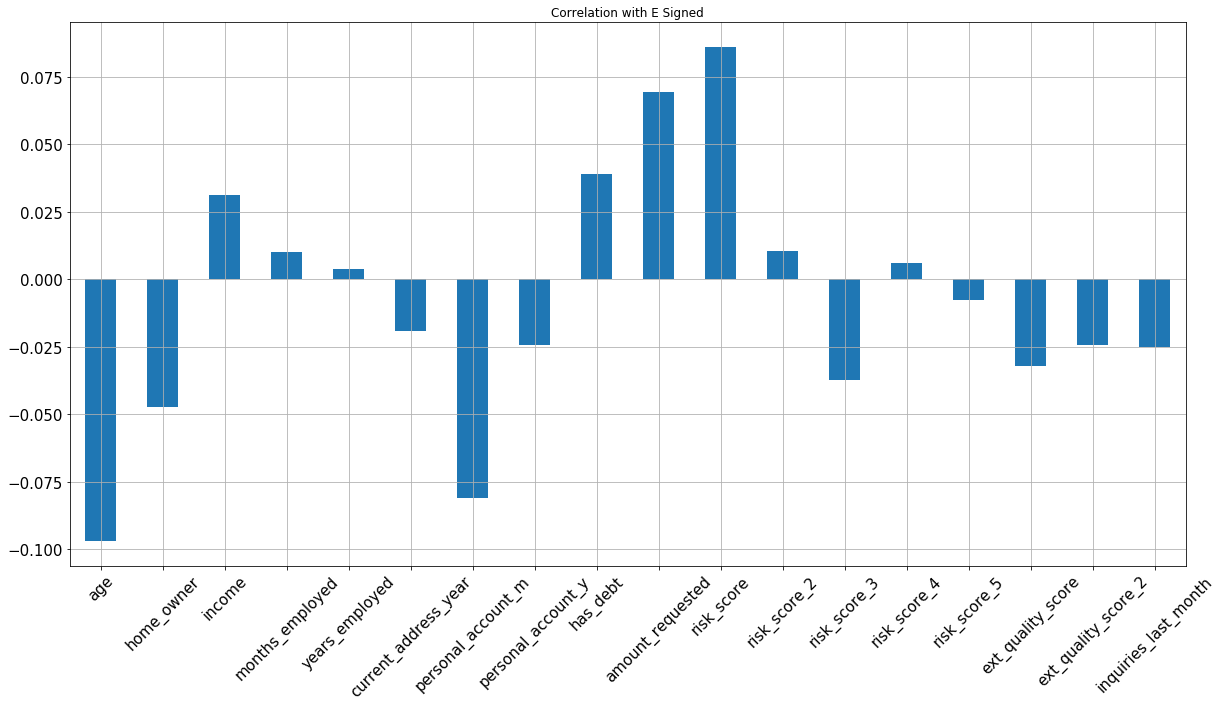

In [8]:
## Correlation with Response Variable
# It gives linear correlation between independet variables and dependent variable
# It would not be the same if the running algorithm is non linear like random forest, svm-kernel rbf
dataset_hist.corrwith(dataset['e_signed']).plot.bar(figsize = (20, 10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

### Notes:
        1. age             : negative correlated, meaning older the age less likely to e-sign
        2. home_owner      : negative correlated, meaning if the user is home owner less likely to e-sign
        3. amount_requested: positive correlated, meaning more amount requested more likely ot e-sign
        5. risk_score      : positive correlated, meaning more the risk is, more likely to e-sign
        6. personal_account_m/y needs to be combined
        7. months_employed and years_employed needs to be combined


      

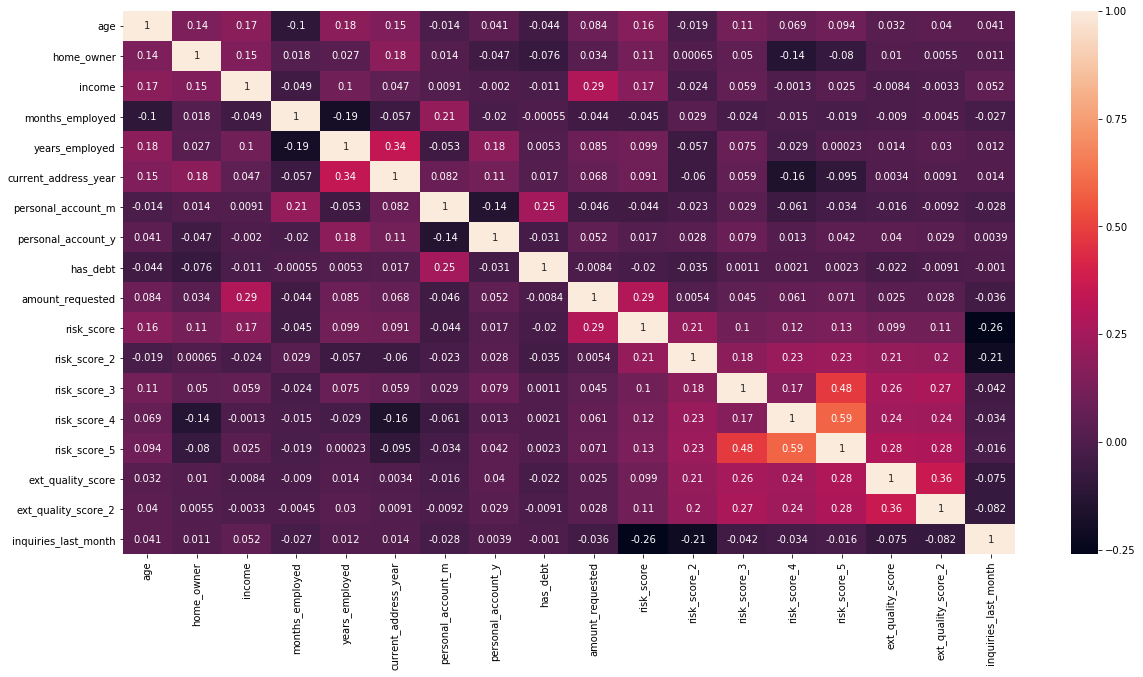

In [9]:
# Checking the correlation between the variables
# parameter annot = True to show the values in the heatmap
plt.figure(figsize = (20,10))
sns.heatmap(dataset_hist.corr(), annot = True)

### Note:
        1. Independent variables are not correlated between each other

## Feature Engineering

In [10]:
dataset_egnin = dataset_hist.copy()
dataset_egnin.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12


In [11]:
# Making new column to put together months_employed and years_employed in just months
dataset_egnin['months_employed_new'] = dataset_egnin['months_employed'] + (dataset_egnin['years_employed'] * 12)

In [12]:
# Making new column to put together personal_account_m and personal_account_y in just months
dataset_egnin['personal_account_m_new'] = dataset_egnin['personal_account_m'] + (dataset_egnin['personal_account_y'] * 12)

In [13]:
#Droping the columns 'months_employed', 'years_employed', 'personal_account_m', 'personal_account_y'
dataset_egnin = dataset_egnin.drop(['months_employed', 'years_employed', 'personal_account_m', 'personal_account_y'], axis = 1)

##### One Hot Encoding

In [14]:
# Adding the categorical feature to the dataset
dataset_egnin = pd.concat([dataset_egnin, dataset['pay_schedule']], axis = 1)

# Encoding categorical feature and droping the first value to avoid dummy variable trap
dataset_egnin = pd.get_dummies(dataset_egnin, drop_first = True)

In [15]:
# Adding respons variables and user identifiers in variables
response = dataset['e_signed']
users = dataset['entry_id']

##### Splitting into Train and Test Set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_egnin, 
                                                    response, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

##### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# StandardScaler returns np.array and removes columns and indexes!
# needs to convert to dataframe and put the columns and indexes back

#Making dataframe
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))

#Putting column names back
X_train2.columns = X_train.columns
X_test2.columns = X_test.columns

#Putting indexes back
X_train2.index = X_train.index
X_test2.index = X_test.index

X_train = X_train2
X_test = X_test2

## Model Building

### Comparing different classification models

##### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
# penalty = 'l1' using lasso regularization regression to reducing over-fitting and in feature selection
logistic = LogisticRegression(random_state = 0, penalty = 'l1')
logistic.fit(X_train, y_train)

/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#Predicting Test Set
predictions = logistic.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

#Confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 653, 1001],
       [ 566, 1362]])

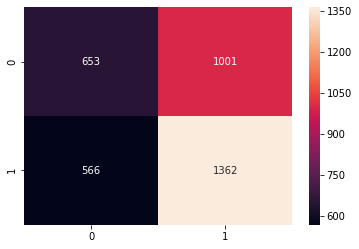

In [21]:
# @param annot - to show the numbers
# @param fmy - formating to numbers to integer
sns.heatmap(cm, annot = True, fmt = 'd')

### Note:
        1. Too many type I errors 1001

In [22]:
#Positive precision score = true positives / true positives + false positives: 1362 / (1362+1001) = 0.58
## Meaning of all the positive predictions what percentage is true

#Positive recall score = true positives / true positives + false negatives: 1362 / (1362+566) = 0.71
## Meaning of all the actual positives predictions what percentage is true

#f1-score precision + recall / 2: 0.58 + 0.71 / 2 = 0.63

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.39      0.45      1654
           1       0.58      0.71      0.63      1928

    accuracy                           0.56      3582
   macro avg       0.56      0.55      0.54      3582
weighted avg       0.56      0.56      0.55      3582



### Note:
        1.Low accuracy due to precision score (type I errors)
    

###### SVM (Linear)

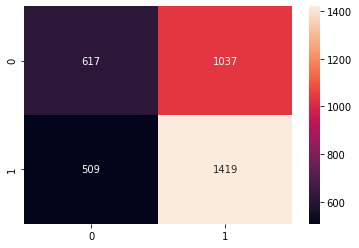

In [23]:
from sklearn.svm import SVC
support_vector = SVC(kernel = 'linear', random_state = 0)
support_vector.fit(X_train, y_train)
#Predicting Test Set
predictions2 = support_vector.predict(X_test)
#Confusion matrix
cm2 = confusion_matrix(y_test, predictions2)
sns.heatmap(cm2, annot = True, fmt = 'd')

In [24]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.55      0.37      0.44      1654
           1       0.58      0.74      0.65      1928

    accuracy                           0.57      3582
   macro avg       0.56      0.55      0.55      3582
weighted avg       0.56      0.57      0.55      3582



### Note:
        1. Better accuracy than logistic regression

###### SVM (rbf)

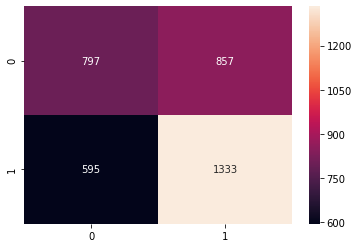

In [25]:
from sklearn.svm import SVC
support_vector_rbf = SVC(kernel = 'rbf', random_state = 0)
support_vector_rbf.fit(X_train, y_train)
#Predicting Test Set
predictions3 = support_vector_rbf.predict(X_test)
#Confusion matrix
cm3 = confusion_matrix(y_test, predictions3)
sns.heatmap(cm3, annot = True, fmt = 'd')

In [26]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.57      0.48      0.52      1654
           1       0.61      0.69      0.65      1928

    accuracy                           0.59      3582
   macro avg       0.59      0.59      0.59      3582
weighted avg       0.59      0.59      0.59      3582



### Note:
        1. Imporved accuracy

##### RandomForest

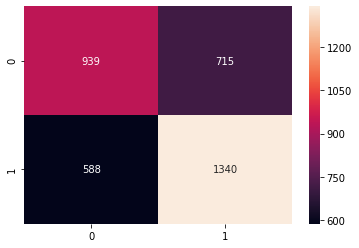

In [27]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators = 100, random_state = 0, criterion = 'entropy' )
randomForest.fit(X_train, y_train)
#Predicting Test Set
predictions4 = randomForest.predict(X_test)
#Confusion matrix
cm4 = confusion_matrix(y_test, predictions4)
sns.heatmap(cm4, annot = True, fmt = 'd')

In [28]:
print(classification_report(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1654
           1       0.65      0.70      0.67      1928

    accuracy                           0.64      3582
   macro avg       0.63      0.63      0.63      3582
weighted avg       0.63      0.64      0.63      3582



#### ANN Model

In [36]:
# Importing the Keras libraries and packages
import keras

#Sequential for building the ANN model
from keras.models import Sequential

#Dense for building layers
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

Using TensorFlow backend.


In [40]:
## Input layer
# @param activation -  is for activation fuction to be used, here we use rectifire activation function with name relu
# @param kernel_initializer - is used for randomly initilation weights uniformly distributed and close to 0
# @param input_dim - is numbers of features to input
# @param units - This parameter is a positive integer that denotes the output size of the layer
input_layer = Dense(input_dim = len(X_train.columns), activation = 'relu', units = 10, kernel_initializer = "uniform")

# Adding the input layer and the first hidden layer to the model
classifier.add(input_layer)

In [41]:
## Hidden layer
hidden_layer = Dense(activation = 'relu', units = 10, kernel_initializer = "uniform")

# Adding the second hidden layer to the model
classifier.add(hidden_layer)

In [42]:
## Hidden layer
hidden_layer2 = Dense(activation = 'relu', units = 10, kernel_initializer = "uniform")

# Adding the second hidden layer to the model
classifier.add(hidden_layer2)

In [43]:
#output layer
output_layer = Dense(activation = 'sigmoid', units = 1, kernel_initializer = "uniform")

# Adding the output layer
classifier.add(output_layer)

In [44]:
## Compiling the ANN
# @param optimizer - is used 'adam' type of  Stochastic Gradient Descent
# @param loss - used binary_crossentropy name of logaritmic loss, since activation function for output layer is sigmoid
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1, nb_epoch = 100)

/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
14326/14326 [==============================] - 12s 808us/step - loss: 0.6767 - accuracy: 0.5675
Epoch 2/100
14326/14326 [==============================] - 12s 816us/step - loss: 0.6631 - accuracy: 0.5921
Epoch 3/100
14326/14326 [==============================] - 12s 843us/step - loss: 0.6542 - accuracy: 0.6101
Epoch 4/100
14326/14326 [==============================] - 13s 903us/step - loss: 0.6517 - accuracy: 0.6101
Epoch 5/100
14326/14326 [==============================] - 12s 838us/step - loss: 0.6490 - accuracy: 0.6132
Epoch 6/100
14326/14326 [==============================] - 12s 864us/step - loss: 0.6467 - accuracy: 0.6160
Epoch 7/100
14326/14326 [==============================] - 12s 871us/step - loss: 0.6461 - accuracy: 0.6128
Epoch 8/100
14326/14326 [==============================] - 12s 841us/step - loss: 0.6438 - accuracy: 0.6187
Epoch 9/100
14326/14326 [==============================] - 12s 850us/step - loss: 0.6432 - accuracy: 0.6206
Epoch 10/100
14326/14326 [==

In [49]:
# Predicting the Test set results
predictions_ann = classifier.predict(X_test)

#Sigmoid function returns probability, making predictions in binary form with threshold 0.5
predictions_ann = predictions_ann > 0.5

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm_ann = confusion_matrix(y_test, predictions_ann)
cm_ann

array([[ 886,  768],
       [ 597, 1331]])

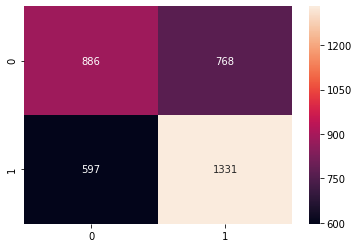

In [50]:
sns.heatmap(cm_ann, annot=True, fmt = 'd')

In [51]:
print(classification_report(y_test, predictions_ann))

              precision    recall  f1-score   support

           0       0.60      0.54      0.56      1654
           1       0.63      0.69      0.66      1928

    accuracy                           0.62      3582
   macro avg       0.62      0.61      0.61      3582
weighted avg       0.62      0.62      0.62      3582



### Note:
        1.Best accuracy with RandomForest 0.64

In [61]:
## K-fold Cross Validation
## checking for overal accuracy and overfiting
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(randomForest, X_train, y_train, cv = 10)
print('Overall score from 10 predictions:', accuracies.mean())
print('Standart deviation from 10 predictions:', accuracies.std())

Overall score from 10 predictions: 0.6255781152976003
Standart deviation from 10 predictions: 0.010691461962992102


### Note:
        1. Standat deviation is 1% meaning that there is no overfitting.

### Parameter Tuning on RandomForest Model

In [55]:
# Applying Grid Search
parameters = {
              'max_depth'        : [None],
              'max_features'     : [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf' : [1, 2, 3],
              'bootstrap'        : [True],
              'criterion'        : ["entropy"]
             }

In [56]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(randomForest, parameters, scoring = 'accuracy', n_jobs = -1, cv = 10)

t0 = time.time()
grid_search.fit(X_train, y_train)
t1 = time.time()

print("Took {} seconds".format(t1 - t0))

Took 343.26947021484375 seconds


In [57]:
print('Best Score: {}'.format(grid_search.best_score_))
print('Best Parameters: {}'.format(grid_search.best_params_))

Best Score: 0.6373726092419377
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 12}


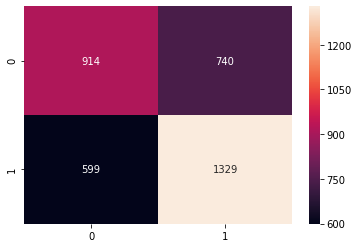

In [58]:
# Predicting Test Set
predictions5 = grid_search.predict(X_test)
#Confusion matrix
cm5 = confusion_matrix(y_test, predictions5)
sns.heatmap(cm5, annot = True, fmt = 'd')

In [59]:
print(classification_report(y_test, predictions5))

              precision    recall  f1-score   support

           0       0.60      0.55      0.58      1654
           1       0.64      0.69      0.66      1928

    accuracy                           0.63      3582
   macro avg       0.62      0.62      0.62      3582
weighted avg       0.62      0.63      0.62      3582



## End of Model

In [60]:
# Formatting Final Results
final_result = pd.concat([y_test, users], axis = 1).dropna()
final_result['predictions'] = predictions5
final_result = final_results[['entry_id', 'e_signed', 'predictions']]
final_result

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,0
17890,3605941,0.0,1
17901,1807355,0.0,1
